In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<AxesSubplot:xlabel='Survived', ylabel='count'>

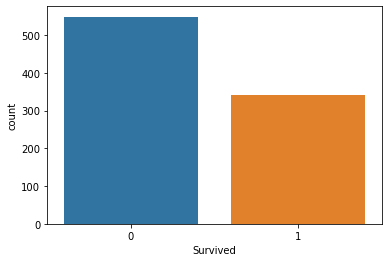

In [4]:
sns.countplot(train_data.Survived)

In [5]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("% of women who survived:", rate_women)

% of women who survived: 0.7420382165605095


In [6]:
men = train_data.loc[train_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("% of men who survived:", rate_men)

% of men who survived: 0.18890814558058924


In [7]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [8]:
from learntools.core import binder
binder.bind(globals())
from learntools.machine_learning.ex2 import *
print("Setup Complete")

Setup Complete


In [9]:
import pandas as pd

titanic_file_path = '/kaggle/input/titanic/test.csv'
titanic_data = pd.read_csv(titanic_file_path) 
titanic_data.describe()




,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:

titanic_data = titanic_data.dropna(axis=0)

In [11]:
titanic_data.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
y = titanic_data.Fare

In [13]:
titanic_features = ['Pclass', 'Age', 'SibSp',]
x = titanic_data[titanic_features]
x.describe()



,Pclass,Age,SibSp
count,87.000000,87.000000,87.000000
mean,1.137931,39.247126,0.597701
std,0.435954,15.218730,0.637214
min,1.000000,1.000000,0.000000
25%,1.000000,27.000000,0.000000
50%,1.000000,39.000000,1.000000
75%,1.000000,50.000000,1.000000
max,3.000000,76.000000,3.000000


In [14]:
x.head()

,Pclass,Age,SibSp
12,1,23.0,1
14,1,47.0,1
24,1,48.0,1
26,1,22.0,0
28,1,41.0,0


In [15]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
titanic_model = DecisionTreeRegressor(random_state=1)

# Fit model
titanic_model.fit(x,y)

DecisionTreeRegressor(random_state=1)

In [16]:
print("Making predictions for the following 5 categories:")
print(x.head())
print("The predictions are")
print(titanic_model.predict(x.head()))

Making predictions for the following 5 categories:
    Pclass   Age  SibSp
12       1  23.0      1
14       1  47.0      1
24       1  48.0      1
26       1  22.0      0
28       1  41.0      0
The predictions are
[ 82.2667     144.35       149.33333333  61.9792      30.5       ]


In [17]:
from sklearn.metrics import mean_absolute_error

predicted_who_survived = titanic_model.predict(x)
mean_absolute_error(y, predicted_who_survived)

19.078

In [18]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state = 0)
titanic_model = DecisionTreeRegressor()
titanic_model.fit(train_x , train_y)
val_predictions = titanic_model.predict(val_x)
print(mean_absolute_error(val_y, val_predictions))


88.47215454545454


In [19]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

def get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_x, train_y)
    preds_val = model.predict(val_x)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  73
Max leaf nodes: 50  		 Mean Absolute Error:  88
Max leaf nodes: 500  		 Mean Absolute Error:  88
Max leaf nodes: 5000  		 Mean Absolute Error:  88


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_x, train_y)
melb_preds = forest_model.predict(val_x)
print(mean_absolute_error(val_y, melb_preds))

80.0042207146104


<AxesSubplot:xlabel='Survived', ylabel='count'>

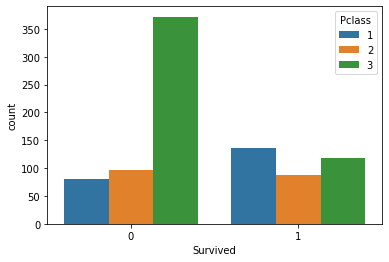

In [21]:
sns.countplot(train_data.Survived, hue=train_data.Pclass) #to check how many survived according to class

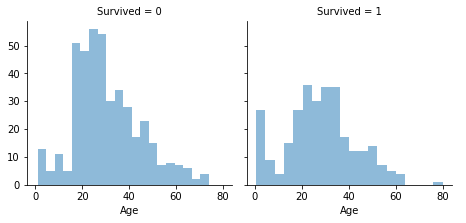

In [22]:
grid = sns.FacetGrid(train_data, col='Survived', size=3.2)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

In [23]:
#checking for missing values
NANColumns=[]
i=-1
for a in train_data.isnull().sum():
    i+=1
    if a!=0:
        print(train_data.columns[i],a)
        NANColumns.append(train_data.columns[i])

Age 177
Cabin 687
Embarked 2


In [24]:
NANColumns=[]
i=-1
for a in test_data.isnull().sum():
    i+=1
    if a!=0:
        print(test_data.columns[i],a)
        NANColumns.append(test_data.columns[i])

Age 86
Fare 1
Cabin 327


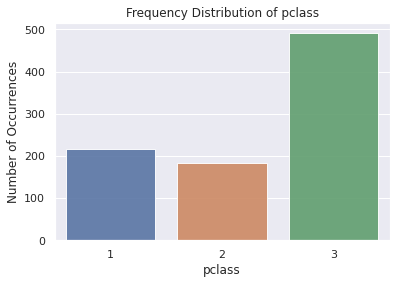

In [25]:
#number of people in each class
carrier_count = train_data["Pclass"].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of pclass')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('pclass', fontsize=12)
plt.show()


In [26]:
test_data.head() # starting work with test data 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [27]:
test_data.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [28]:
test_data.info

<bound method DataFrame.info of      PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  


In [29]:
np.sum(test_data.isnull().any(axis=1)) #finding null values in test data

331

In [30]:
NANColumns=[] # missing values of test data
i=-1
for a in test_data.isnull().sum():
    i+=1
    if a!=0:
        print(test_data.columns[i],a)
        NANColumns.append(test_data.columns[i])

Age 86
Fare 1
Cabin 327


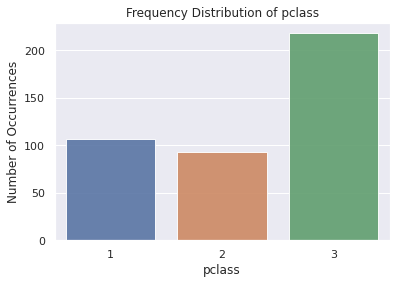

In [31]:
carrier_count = test_data["Pclass"].value_counts() # visualizing survival rate according to pclass
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of pclass')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('pclass', fontsize=12)
plt.show()

In [32]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

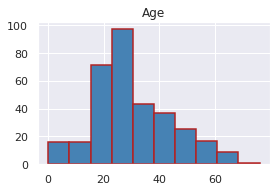

In [33]:
num_atts = ['Age']  # age visualization
test_data[num_atts].hist(figsize = (15, 6), color = 'steelblue', edgecolor = 'firebrick', linewidth = 1.5, layout = (2, 3));

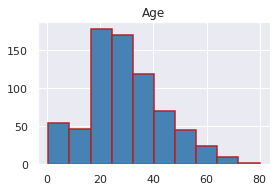

In [34]:
num_atts = ['Age']  # age visualization
train_data[num_atts].hist(figsize = (15, 6), color = 'steelblue', edgecolor = 'firebrick', linewidth = 1.5, layout = (2, 3));

imortant points:

we can note that the third class is the most filled
the median age of people on the ship is approximately 30 ie most of the people on board are approximately 30 

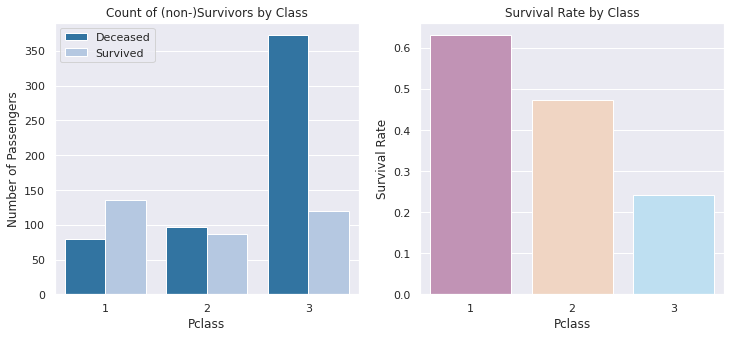

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(x = 'Pclass', hue = 'Survived', data = train_data,  palette = 'tab20', ax = ax1) 
ax1.legend(['Deceased', 'Survived'])
ax1.set_title('Count of (non-)Survivors by Class')
ax1.set_ylabel('Number of Passengers')

sns.barplot(x = 'Pclass', y = 'Survived', data = train_data,  palette = ['#C98BB9', '#F7D4BC', '#B5E2FA'], ci = None, ax = ax2)
ax2.set_title('Survival Rate by Class')
ax2.set_ylabel('Survival Rate');

Even though there were more passengers in 3rd class the number of people survived is less
but in the 1st class cabin the number of people survived is high
survival rate increases as we move from the 3rd class to 1st class.